In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("../Data/data2/Loan_default.csv")
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
print(df.describe())

                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149999.000000  249999.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   255347.000000   255347.000000  255347.000000  255347.000000   
mean        59.541976        2.501036      13.492773      36.025894   
std         34.643376        1.117018       6.636443      16.969330   
min          0.000000        1.000000       2.000000      12.000000   
25%         30.000000  

In [8]:
print(df.shape)

(255347, 18)


In [9]:
print(df['Default'].value_counts())
df['Default'].value_counts(normalize=True)

Default
0    225694
1     29653
Name: count, dtype: int64


Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

In [10]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [11]:
b_f = ['HasMortgage', 'HasDependents','HasCoSigner']
for col in b_f:
    df[col] = df[col].replace({1: 'Yes', 0: 'No'})
     

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Numerical col:", num_cols)
print("Categorical col:", cat_cols)

Numerical col: Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')
Categorical col: Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x29ce3b9fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x29ce3be0190>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ce200fd90>],
 'medians': [<matplotlib.lines.Line2D at 0x29ce3be0410>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ce3be0550>],
 'means': []}

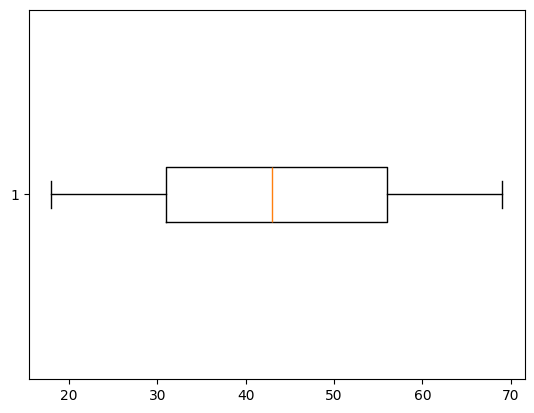

In [13]:
plt.boxplot(df['Age'], vert=False)

<Axes: xlabel='Income', ylabel='Count'>

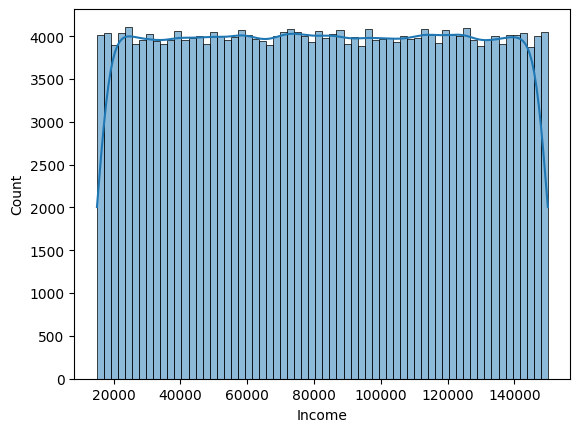

In [14]:
sns.histplot(df['Income'], kde=True)

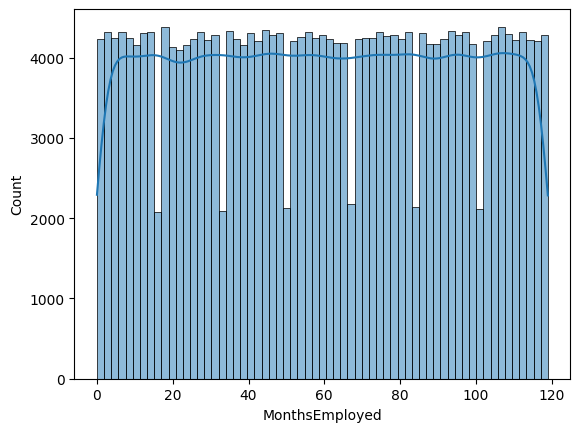

In [15]:
sns.histplot(df['MonthsEmployed'], kde=True)
plt.show()

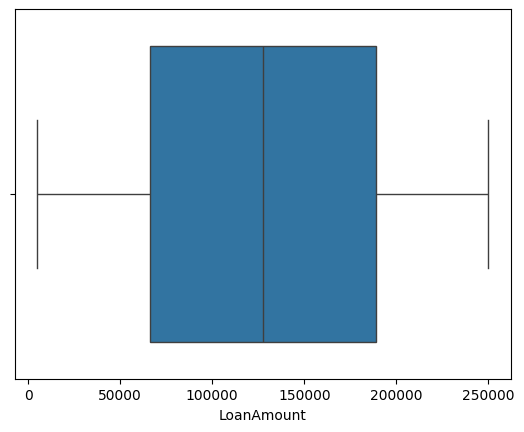

In [16]:
sns.boxplot(x=df['LoanAmount'])
plt.show()


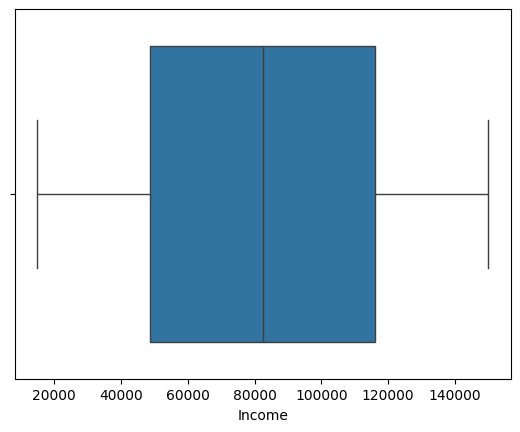

In [17]:
sns.boxplot(x=df['Income'])
plt.show()


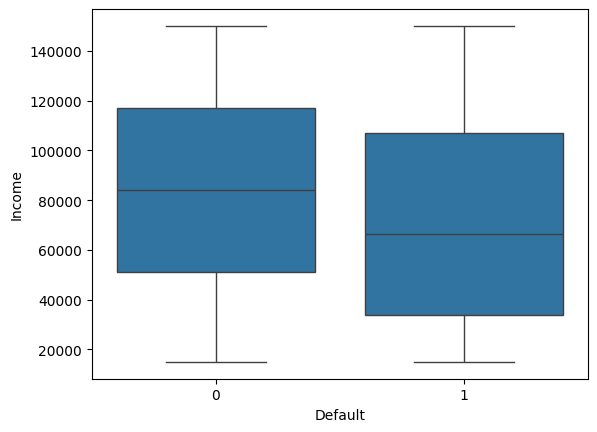

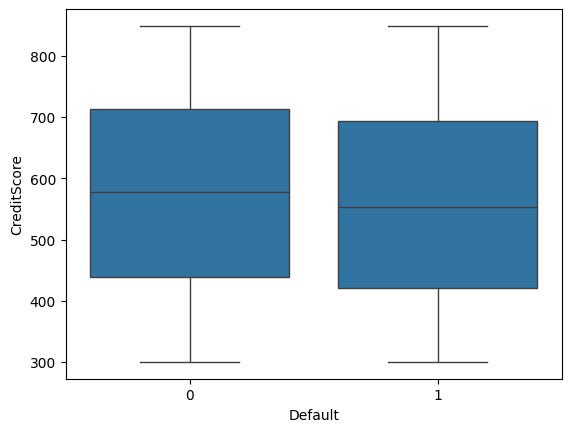

In [18]:
sns.boxplot(x='Default', y='Income', data=df)
plt.show() # from this plot we can say that the people who repaid the loan have higher income than those who have not repaid the loan
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.show() # from this plot we can say that the people who repaid the loan have higher credit score than those who have not repaid the loan

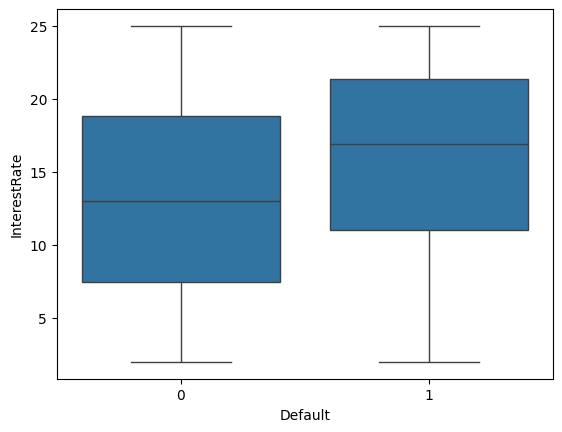

In [19]:
sns.boxplot(x='Default', y='InterestRate', data=df)
plt.show() # from this plot we can say that the people who repaid the loan have lower interest rate than those who have not repaid the loan

In [20]:
print(df.columns)


Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [21]:
df.drop(['LoanID'], axis=1, inplace=True)

In [22]:
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)


Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')


In [23]:
X_final = df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
              'InterestRate', 'LoanTerm', 'HasCoSigner']]


In [26]:
from sklearn.model_selection import train_test_split
X = df[X_final.columns]
y = df["Default"]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_features = [
 'HasCoSigner'
]

numeric_features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed','InterestRate', 'LoanTerm'
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))




Accuracy: 0.6684354807127472
Confusion Matrix:
 [[30081 15089]
 [ 1844  4056]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     45170
           1       0.21      0.69      0.32      5900

    accuracy                           0.67     51070
   macro avg       0.58      0.68      0.55     51070
weighted avg       0.86      0.67      0.73     51070

ROC AUC Score: 0.742396156891292


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(class_weight='balanced', random_state=42))
])
rf_pipeline.fit(x_train, y_train)
y_pred_rf = rf_pipeline.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
y_pred_rf_proba = rf_pipeline.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf_proba))


Accuracy: 0.8855688271000588
Confusion Matrix:
 [[44992   178]
 [ 5666   234]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.57      0.04      0.07      5900

    accuracy                           0.89     51070
   macro avg       0.73      0.52      0.51     51070
weighted avg       0.85      0.89      0.84     51070

ROC AUC Score: 0.7173397222545337


In [30]:
from xgboost import XGBClassifier
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(scale_pos_weight= 8, random_state=42))
])
xgb_pipeline.fit(x_train, y_train)
y_pred_xgb = xgb_pipeline.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
y_pred_xgb_proba = xgb_pipeline.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb_proba))


Accuracy: 0.6957117681613472
Confusion Matrix:
 [[31747 13423]
 [ 2117  3783]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.70      0.80     45170
           1       0.22      0.64      0.33      5900

    accuracy                           0.70     51070
   macro avg       0.58      0.67      0.57     51070
weighted avg       0.85      0.70      0.75     51070

ROC AUC Score: 0.7318699320457931


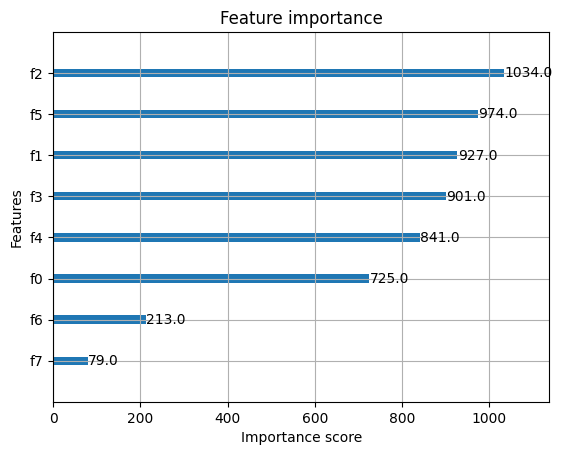

In [31]:
from xgboost import plot_importance

plot_importance(xgb_pipeline.named_steps['classifier'])
plt.show()


In [35]:
import joblib
joblib.dump(xgb_pipeline, "loan_pipeline_final.pkl")


['loan_pipeline_final.pkl']